# NOTEBOOK 5 State machines
---
This notebook contains 2 assignments

Reference:

https://brilliant.org/wiki/finite-state-machines/

https://en.wikipedia.org/wiki/Finite-state_machine



## Introduction
In the Python course you learned how to develop Algoritms and how to analyse data.  As stated before microcontrollers are used to control all kind of processes and devices like elevaters, traffic lights or vending machines. These devices (or machines) perform a predetermined sequence of actions depending on a sequence of events with which they are presented. To control these kind of machines a computation model is used, called Finite State machine (or state-machine).

A finite-state machine (FSM) or simply a state machine, is a mathematical model of computation. It is an abstract machine that can be in exactly one of a finite number of states at any given time. The set of states a system can occupy is known as its state space. In a discrete system, the state space is countable and often finite. The FSM can change from one state to another in response to some inputs; the change from one state to another is called a transition. A FSM is defined by a list of its states, its initial state, and the inputs that trigger each transition. 
 
The behavior of state machines can be observed in many devices in modern society that perform a predetermined sequence of actions depending on a sequence of events with which they are presented. Simple examples are: vending machines, which dispense products when the proper combination of coins is deposited; elevators, whose sequence of stops is determined by the floors requested by riders; traffic lights, which change sequence when cars are waiting; combination locks, which require the input of a sequence of numbers in the proper order.

Finite state machines can be used to model problems in many fields including mathematics, artificial intelligence, games, and linguistics. In this assignment we only control simple machines with a micro controller (like a M&M sorting machine).

In the reference a Turntile as example system is described. A Turntile can be in 2 states: Locked and Unlocked. When a coin is inserted, the turntil is unlocked and the person can push the rod to enter. Once the rod has moved, the turntil is locked again. This process repeats its selves. Pushing during the locked state and inserting coins in the unlocked state are ignored.

A state machine is defined with the following elements:
- **States**: are moments in which the machine is waiting for some input to change states (Locked and unlocked)
- **State transistions**: are changes in states Locked to unlocked and unlocked to locked. With a transistion an output is activated (Mealy principle).
- **Inputs** (or Events): The trigger to initiate a state transistion are called the Inputs or Events. Events can be generated from sensors, timers, finisch of processes, etc. The result of a Event is always a true or false. For analog sensors you define a threshold to define True or False.
- **Outputs** (or Actions): The outputs initiate something to the outside world, e.g. turn light on, print something. This is dependent of the state transition. 

This process can be presented in a state-diagram:
![State diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Turnstile_state_machine_colored.svg/1024px-Turnstile_state_machine_colored.svg.png)

In some finite-state machine representations, it is also possible to associate actions with a state:
- an entry action: performed when entering the state, and
- an exit action: performed when exiting the state.


When you search for examples for FSM in Python you will find libraries to define and run state machine. To keep overview and to better understand how a state machine is build we use a more simple method. Basic principles are:
1. every state is a function
2. every output is a function
3. check of states with `if` and `elif`
>a more "nicer" way to check states is a construction with the `match case` statement, however this statement is only available in python version 3.10 see [PEP 634: Structural Pattern Matching](https://docs.python.org/3/whatsnew/3.10.html#pep-634-structural-pattern-matching). `Circuitpython` (based on MicroPython) implements Python 3.4 and some select features of Python 3.5 and above. 

We go back to the LED blinking sketch and approach this as a FSM. We will add a functionality to dim the LED to 50% (using PWM).

First the states are defined and the state transistions are defined. The first state (after startup) is the LEDoff state and with every short of long button push the state changes to the next state. See belows diagram

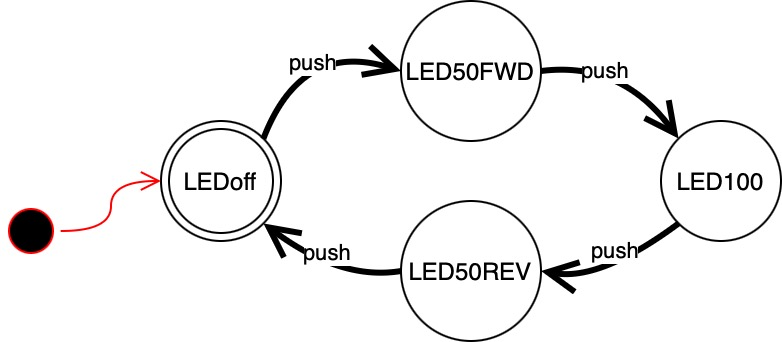

Once the states are defined your script will only check in what state it is and call the state function in which the triggers are read and the state changes are initiated. The core script looks like this:

In [ ]:
while(1):
    if state == LEDoff:
        LEDOffState()
    elif state == LED50FWD:
        LED50FWDState()
    elif state == LED50REV:
        LED50REVState()
    elif state == LED100:
        LED100State()

To code this state machine the pins of the LED and push button are defined (including the needed libraries)

In [ ]:
import time
import board
from digitalio import DigitalInOut, Direction, Pull
import pwmio
from adafruit_debouncer import Button

# button setup
pin = DigitalInOut(board.D12) # pin defined
pin.direction = Direction.INPUT
pin.pull = Pull.UP
button = Button(pin) # use the debouncer lib

# LED setup D13 is the build in LED:
led = pwmio.PWMOut(board.D13, frequency=5000, duty_cycle=0)

the next steps is to define the states and assign the states to the `state` and `priorState` (why a state `NONE` and `priorstate` are defined will become clear later on)

In [ ]:
# Define States
NONE = 0
LEDoff = 1
LED50FWD = 2
LED50REV = 3
LED100 = 4

# initial state
priorState = NONE
state = LEDoff

In this case only one output function is defined to control LED with PWM duty cycle.

In [ ]:
#define output function. In this case it is one configurable function iso 3 for each dim setting
def ledDim(dim): # percentage
    dutyCycle = int(dim/100.0*65535)
    led.duty_cycle = dutyCycle

All state functions have an equal structure, namely part that is executed at entering the state, part that perform function during the state, a part to check for state changes and a part that is executed on the exit of the function. Here we use `priorState` to detect state changes

In [ ]:
def LEDOffState():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state off")
        ledDim(0)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED50FWD
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state 
           
def LED50FWDState():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 50% FWD")
        ledDim(50)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED100
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state        

def LED50REVState():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 50% REV")
        ledDim(50)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LEDoff
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state        
    
    
def LED100State():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 100%")
        ledDim(100)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED50REV
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state   


The only thing left is a "simple" script to check the states in a while loop. This loop is never waiting for input and runs continiously.

In [ ]:
while(1):
    if state == LEDoff:
        LEDOffState()
    elif state == LED50FWD:
        LED50FWDState()
    elif state == LED50REV:
        LED50REVState()
    elif state == LED100:
        LED100State()

---
## Assignment 1
Add a functionality to switch the LED off after 10s. Use the program above as a starter and add a timer function in one of the state functions (NO sleeping allowed).

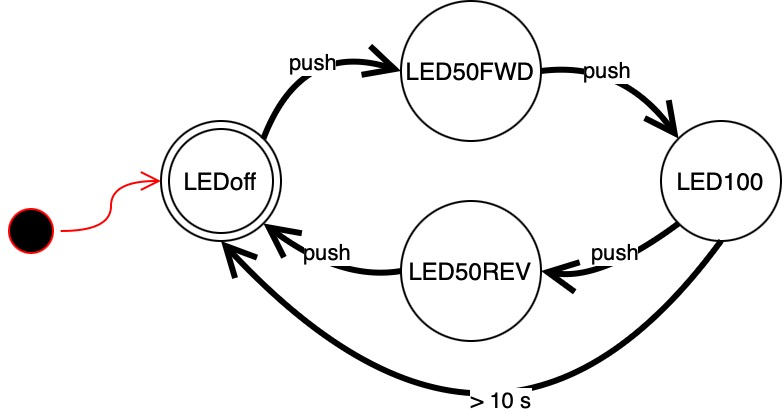

In [ ]:
# =============== YOUR CODE GOES HERE =================

import time
import board
from digitalio import DigitalInOut, Direction, Pull
import pwmio
from adafruit_debouncer import Button

# button setup
pin = DigitalInOut(board.D12) # pin defined
pin.direction = Direction.INPUT
pin.pull = Pull.UP
button = Button(pin) # use the debouncer lib

# LED setup D13 is the build in LED:
led = pwmio.PWMOut(board.D13, frequency=5000, duty_cycle=0)

# Define States
NONE = 0
LEDoff = 1
LED50FWD = 2
LED50REV = 3
LED100 = 4

# initial state
priorState = NONE
state = LEDoff
current_time = time.monotonic()

#define output function. In this case it is one configurable function iso 3 for each dim setting
def ledDim(dim): # percentage
    dutyCycle = int(dim/100.0*65535)
    led.duty_cycle = dutyCycle
    
def LEDOffState():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state off")
        ledDim(0)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED50FWD
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state 
           
def LED50FWDState():
    global state, priorState
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 50% FWD")
        ledDim(50)
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED100
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state        

def LED50REVState():
    global state, priorState
    initial_time = time.monotonic()
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 50% REV")
        ledDim(50)        
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LEDoff
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state        
    
    
def LED100State():
    global state, priorState, current_time
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("state 100%")
        ledDim(100)
        current_time = time.monotonic()

        
    while time.monotonic() - current_time > 10:
        state = LEDOffState()
        # do something at start of state
    
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        state = LED50REV
 
    # If we are leaving the state, do clean up stuff
    if (state != priorState):
        pass # do something at end of state   


while(1):
    if state == LEDoff:
        LEDOffState()
    elif state == LED50FWD:
        LED50FWDState()
    elif state == LED50REV:
        LED50REVState()
    elif state == LED100:
        LED100State()

---
## Assignment 2: Reaction timer tester

In the next assignment you will build a reaction time tester as a state machine. Use the programstructure as shown above. Add a LED and use the 2 push buttons from the Shield.

The functional requirements:
- The reaction time is an average over 5 tests. 
- After the 5 tests, the individual test results and the average is reported. 
- The person in subject will push a button to start. After a random amount of time the LED wil turn on. The testperson wil push the button again, and the LED goes off. 
- If the testperson pushes the button to early or it takes more than 5 seconds to push, the try is aborted. 
- A 2nd button is used to abort the whole test.
- For program control / debugging add print statements to track state changes
- You are free to add more LED's to make it more fancy or any other stimulating messages.

Consider using the debouncer library to read button states

First draw up your statemachine scheme (you can use [draw.io](draw.io) or similar program. From `draw.io` you can export the schematic  and copy/past this in a cell.

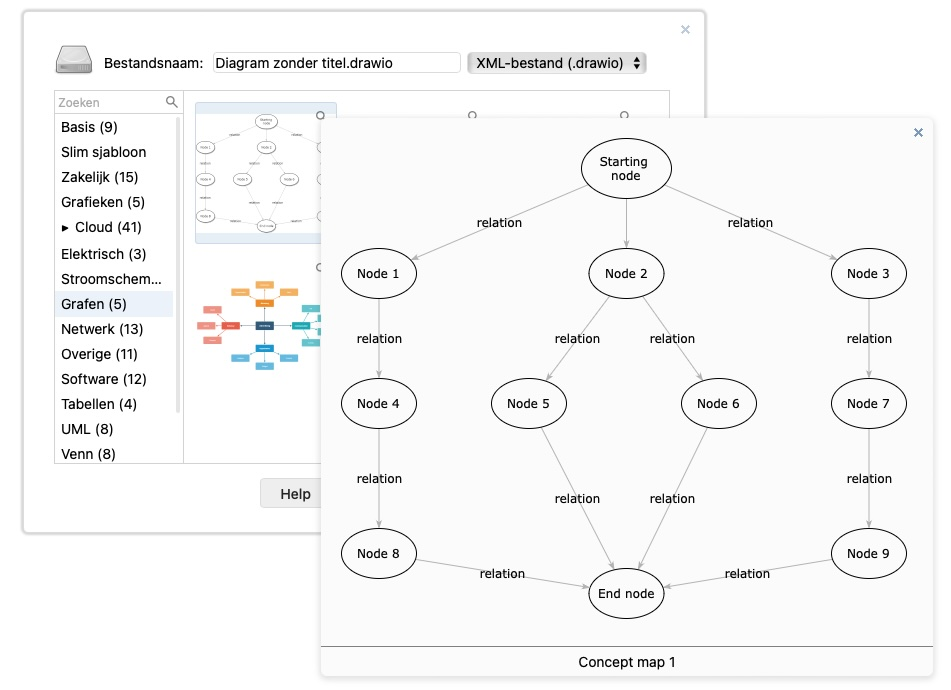

Start with the basic functions (testing reaction time with LED and button) and extend this once the basis is set.


---
Include your FSM scheme

Built your system according to this specfication.

In [ ]:
# =============== YOUR CODE GOES HERE =================

import time
import board
from digitalio import DigitalInOut, Direction, Pull
import pwmio
from adafruit_debouncer import Button
import random


start_time = time.monotonic()
end_time = time.monotonic()
current_time = time.monotonic()
total_time = []
counter = 0
# button setup
pin = DigitalInOut(board.D12) # pin defined
pin.direction = Direction.INPUT
pin.pull = Pull.UP
button = Button(pin) # use the debouncer lib

# LED setup D13 is the build in LED:
led = pwmio.PWMOut(board.D13, frequency=5000, duty_cycle=0)

# Define States
NONE = 0
LEDoff = 1
LEDon = 2
Try = 3
Results = 4

# initial state
priorState = NONE
state = LEDoff


def ledDim(dim):
    dutyCycle = int(dim/100.0*65535)
    led.duty_cycle = dutyCycle
    
def ResultsState():
    global state, priorState, start_time, end_time, total_time, counter
    if state != priorState:
        counter += 1
        priorState = state
        total_time.append(end_time - start_time)
        ledDim(0)
        time.sleep(0.1)
        print("Nice!")
        if counter < 5:
            state = Try
        
        else:
            print(f"Your average reaction time was: {sum(total_time)/len(total_time)} seconds!")
            print(total_time)
            total_time = []
            counter = 0
            state = LEDoff
    
def LEDOffState():
    global state, priorState
    if state != priorState:
        priorState = state
        print("state off")
        ledDim(0)
        
    button.update()
        
    if button.pressed:
        state = Try
    
    if (state != priorState):
        pass

def TryState():
    global state, priorState, start_time, current_time
    if state != priorState:
        randomval = random.randint(1,5)
        priorState = state
        print("Try State")
        current_time = time.monotonic()

        while time.monotonic() - current_time < randomval:
            start_time = time.monotonic()
            state = LEDon


def LEDOnState():
    global state, priorState, start_time, end_time
    # If we are entering the state, do initialization stuff
    if state != priorState:
        priorState = state
        print("GO")
        ledDim(100)
    
    while time.monotonic() - start_time > 8:
        current_time = time.monotonic()
        ledDim(0)
        state = Try
        
    # Perform state tasks
    button.update()
    
    # Check for state transitions (check on events)
    if button.pressed:     
        end_time = time.monotonic()
        state = Results

 
    if (state != priorState):
        pass


while(1):
    if state == LEDoff:
        LEDOffState()
    elif state == Try:
        TryState()
    elif state == LEDon:
        LEDOnState()
    elif state == Results:
        ResultsState()



Copy-paste your outputs:

In [ ]:
# =============== YOUR OUTPUTS GOES HERE =================
